<a href="https://colab.research.google.com/github/Javsk891/Air-Quality-Medell-n/blob/main/RNN_PM2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Nueronales Recurrentes (RNN) para el Forecasting de PM2.5 (Medellín)

## Introducción:

Este notebook de Colab utiliza Redes Neuronales Recurrentes (RNN) para realizar el pronóstico de la variable PM2.5 en la ciudad de Medellín. Las RNN son un tipo de red neuronal especialmente diseñada para modelar secuencias de datos, lo que las hace particularmente efectivas en tareas de predicción temporal, como el forecasting de la calidad del aire.

Las redes neuronales son un modelo computacional inspirado en el funcionamiento del cerebro humano. En el contexto de predicciones, las redes neuronales aprenden patrones complejos en los datos de entrada y son capaces de generalizar esos patrones para hacer predicciones sobre nuevos datos. Las RNN, en particular, son capaces de recordar información de entradas anteriores a medida que procesan nuevas entradas, lo que las hace especialmente adecuadas para secuencias de datos, como series temporales.

En el caso específico de la ciudad de Medellín, la calidad del aire es una preocupación importante debido a diversos factores, como el tráfico vehicular, la industria y las condiciones geográficas. El PM2.5 es una medida de las partículas finas en suspensión en el aire, las cuales pueden tener un impacto significativo en la salud humana al ser inhaladas. Por lo tanto, realizar pronósticos precisos sobre los niveles de PM2.5 es crucial para implementar medidas de control y mitigación que contribuyan a mejorar la calidad del aire y, en última instancia, la calidad de vida de los habitantes de la ciudad.

En este notebook, exploraremos cómo utilizar RNN para predecir los niveles de PM2.5 en Medellín, aprovechando la capacidad de estas redes para capturar patrones temporales en los datos y proporcionar pronósticos precisos que puedan ayudar en la toma de decisiones para mejorar la calidad del aire en la ciudad.

# Importamos las librerias necesarias para dessarrollar el modelo

En el desarrollo del modelo de Redes Neuronales Recurrentes (RNN), se han importado varias bibliotecas esenciales para el análisis de datos, la construcción del modelo y la visualización de resultados. Entre estas bibliotecas se encuentran pandas, numpy, seaborn y matplotlib para la manipulación y visualización de datos; statsmodels para el análisis estadístico y la modelización de series temporales; y sklearn para la evaluación del rendimiento del modelo, incluyendo métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) y la puntuación R-cuadrado (R²).

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sgt

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller, kpss

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Carga de los datos para el modelo
El dataset utilizado en este estudio se obtuvo de la estación El Volador del Sistema de Alerta Temprana de Medellín para la Calidad del Aire (SIATA), ubicada en la ciudad de Medellín, Colombia. La estación El Volador es una de las múltiples estaciones de monitoreo de la calidad del aire distribuidas en toda la ciudad, diseñadas para medir y registrar diversos contaminantes atmosféricos, incluyendo partículas en suspensión de tamaño menor a 2.5 micrómetros (PM2.5), óxidos de nitrógeno (NOx), ozono (O3), entre otros.

La estación El Volador se encuentra ubicada en el nororiente de la ciudad, en el Cerro El Volador, una elevación natural que forma parte del sistema montañoso que rodea Medellín. Esta ubicación estratégica proporciona un punto de observación importante para monitorear la calidad del aire en una zona que puede verse afectada por diversos factores, como el tráfico vehicular, la actividad industrial y las condiciones climáticas locales. Además, la estación El Volador se encuentra en una ubicación elevada, lo que puede influir en la dispersión de contaminantes y en la calidad del aire en áreas circundantes. El dataset obtenido de esta estación proporciona una valiosa fuente de datos para analizar y comprender la evolución de la calidad del aire en la ciudad de Medellín, así como para desarrollar modelos de predicción que contribuyan a gestionar y mejorar la calidad del aire en la región.



In [55]:
# Importar dataset desde Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
# Carga el archivo CSV
data = pd.read_csv("/content/gdrive/My Drive/data_volador2.csv")
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Fecha,Nombre de la estación,Latitud,Longitud,Nombre del municipio,Dirección del Viento,Humedad Relativa,...,NO,NO2,O3,PM10,PM2.5,Precipitación Líquida,Presión Atmosférica,Radiación Solar Global,Temperatura a 10 m,Velocidad del Viento
0,0,3152,3152,2011-01-19 11:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,0.0,-258980.362975,...,47.968750,53.953125,11.062500,105.134315,30.0,0.313871,640.8386,4.0,20.25972,0.0
1,1,3161,3161,2011-01-19 12:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,0.0,-258985.180275,...,27.640625,34.820312,9.890625,49.945061,15.0,0.573933,640.3893,4.0,20.25972,0.0
2,2,3170,3170,2011-01-19 13:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,0.0,-258985.894651,...,24.539062,31.921875,9.687500,41.398048,13.0,0.612555,639.6774,4.0,20.25972,0.0
3,3,3179,3179,2011-01-19 14:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,0.0,-258986.505366,...,22.000000,29.523438,9.546875,34.560440,11.0,0.645500,638.8431,4.0,20.25972,0.0
4,4,3188,3188,2011-01-19 15:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,0.0,-258986.245920,...,24.937500,31.843750,10.015625,45.305256,7.0,0.630291,638.0699,4.0,20.25972,0.0


In [57]:
# Seleccionamos el perido de tiempo en que se realiza el entrenamiento, validación y testeo del modelo
data = data.loc[(data['Fecha'] >= '2013-01-01 00:00:00') & (data['Fecha'] <= '2014-12-31 23:00:00')]

In [58]:
# Selección de las columnas que seutilizaran para el forecasting de PM2.5
data = data[['Fecha', 'PM2.5']]
data.head()

,Fecha,PM2.5
11576,2013-01-01 00:00:00,34.0
11577,2013-01-01 01:00:00,49.0
11578,2013-01-01 02:00:00,69.0
11579,2013-01-01 03:00:00,42.0
11580,2013-01-01 04:00:00,55.0


In [59]:
# Convertir la columna 'PM2.5' a una serie de tiempo
data1 = pd.Series(data['PM2.5'])
# Convertir la columna 'Fecha' al formato de fecha correcto
data2 = pd.to_datetime(data['Fecha'])

#Una breve exploración de los datos

Es importante visualizar la variable PM2.5 como serie de tiempo porque nos permite comprender su comportamiento a lo largo del tiempo y detectar patrones, tendencias y estacionalidades que pueden no ser evidentes en un análisis estático. Al representar los datos de PM2.5 en forma de serie temporal, podemos identificar cambios en los niveles de contaminación a lo largo del día, la semana o el año, así como eventos específicos que puedan influir en la calidad del aire, como picos de contaminación durante horas pico de tráfico o fenómenos meteorológicos extremos.

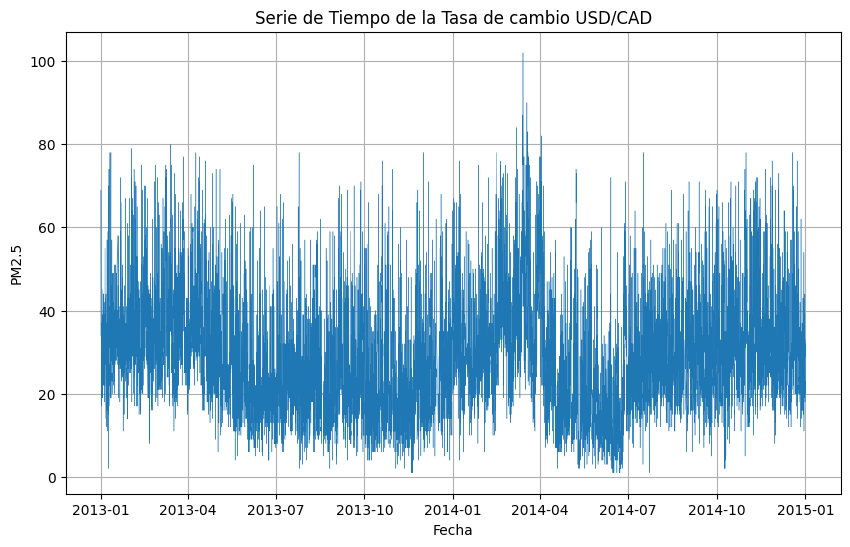

In [62]:
# Graficar la serie de tiempo con fechas en el eje x
plt.figure(figsize=(10, 6))
plt.plot(data2, data1, linewidth=0.3)
plt.title('Serie de Tiempo de la Tasa de cambio USD/CAD')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

#Media Movil

La media móvil es importante en este proceso porque ayuda a identificar estacionariedad en los datos. Al suavizar las fluctuaciones aleatorias, la media móvil puede revelar patrones de comportamiento que indican si la serie temporal exhibe estacionariedad, es decir, si la media y la varianza de la serie son constantes a lo largo del tiempo. Esto es crucial para el análisis de series temporales y el modelado de datos, ya que la estacionariedad es un requisito común para muchos modelos estadísticos y de predicción. La identificación de estacionariedad proporciona una base sólida para la construcción de modelos precisos y confiables.

In [63]:
# Calcula la media móvil y la desviación estándar móvil
rolling_mean = data1.rolling(4).mean()
rolling_std = data1.rolling(4).std()
rolling_std

11576          NaN
11577          NaN
11578          NaN
11579    14.977761
11580    11.470978
           ...    
28815     2.943920
28816     5.196152
28817     4.991660
28818     2.160247
28819     2.380476
Name: PM2.5, Length: 17244, dtype: float64

# Descomposición estacional

La descomposición estacional divide una serie temporal en sus componentes básicas: tendencia, estacionalidad y residuo. Después de la descomposición, trazar las componentes descompuestas junto con la serie original permite visualizar patrones, tendencias y ciclos estacionales en los datos, facilitando la comprensión de la estructura temporal y la evaluación del modelo.

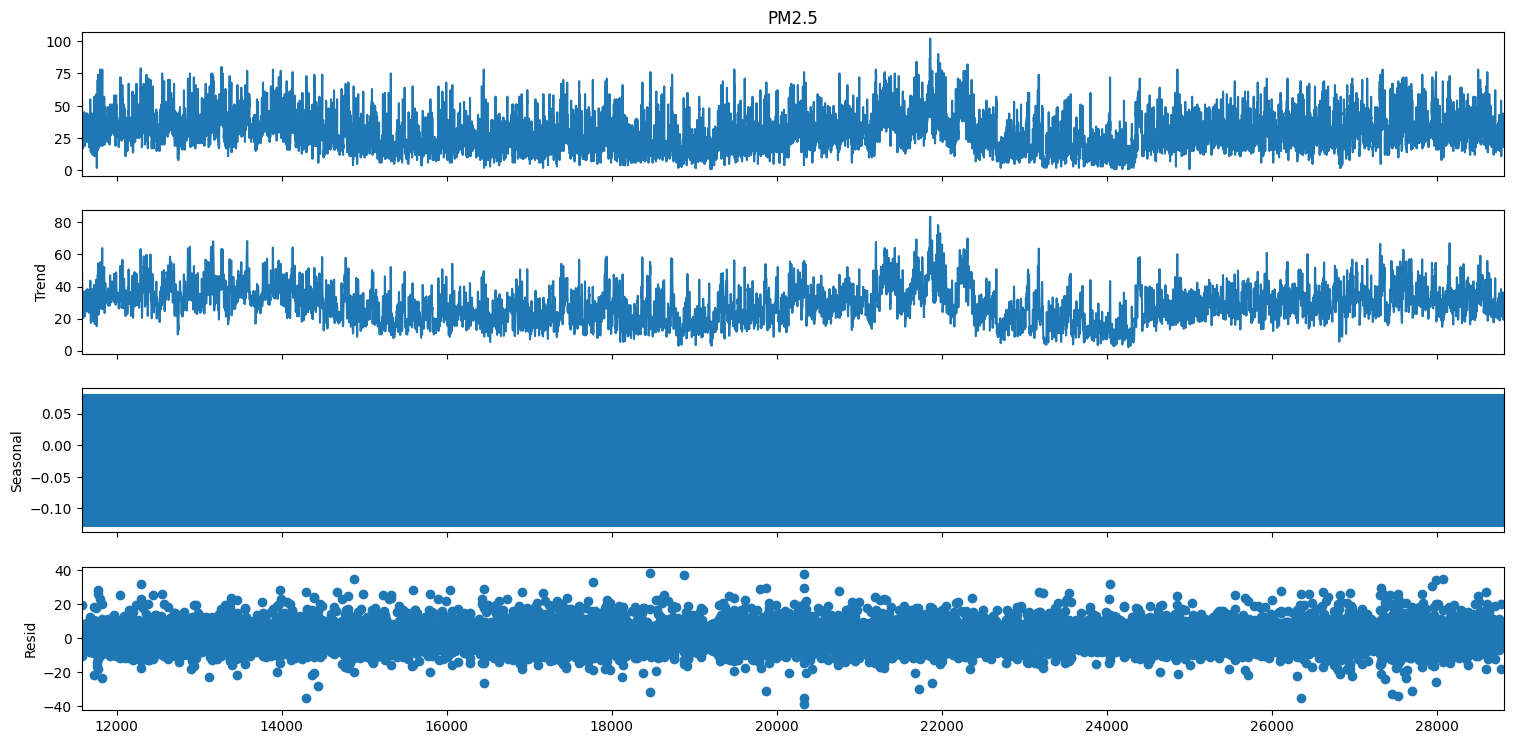

In [64]:
# Realizar la descomposición estacional
decomp = sm.tsa.seasonal_decompose(data1, period=5)  # Período establecido en 7 días

# Trazar los componentes de la descomposición
fig = decomp.plot()
fig.set_size_inches(15, 8)
plt.show()

In [65]:
# Estacionalidad
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, zero = False, lags = 40, ax = axes[0])
    sgt.plot_pacf(series, zero = False, lags = 40, ax = axes[1])

    plt.show()

In [41]:
pip install sgt

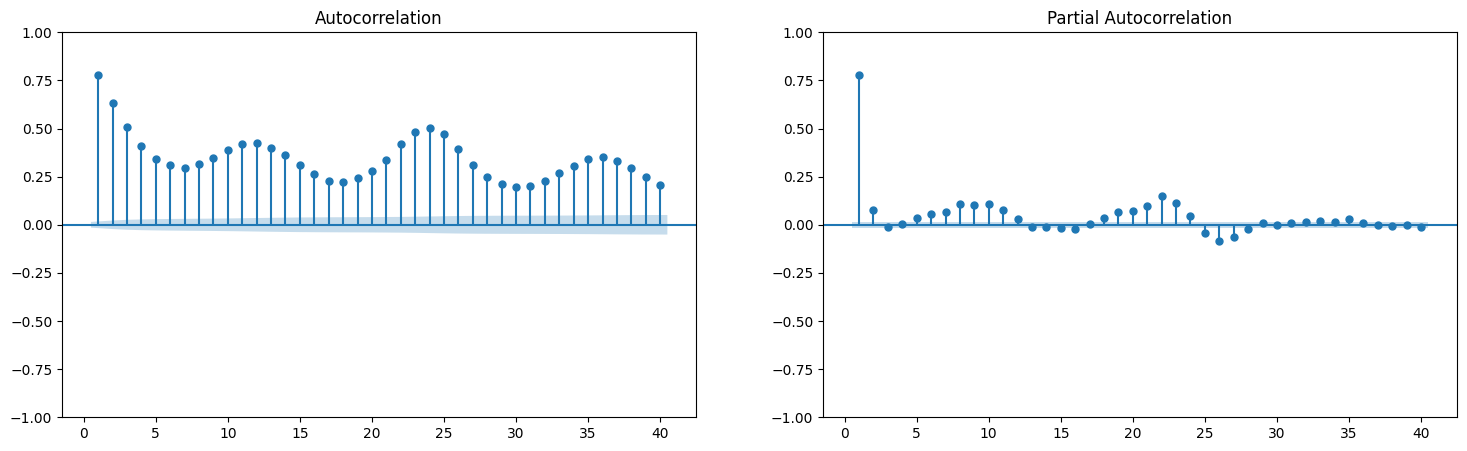

In [66]:
plot_acf_pacf(data['PM2.5'])

In [67]:
# Probamos los Dickey-Fuller para saber si hay estacionalidad
result = adfuller(data['PM2.5'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

ADF Statistic: -9.226303121206927
p-value: 1.7254879932304977e-15
Critical Values: {'1%': -3.430730270728269, '5%': -2.8617080647893753, '10%': -2.566859456556977}
La serie es estacionaria.


Una serie se considera estacionaria cuando el estadístico ADF (Augmented Dickey-Fuller) es menor que los valores críticos para un nivel de significancia dado (generalmente 5%), lo que indica que la serie tiene raíz unitaria y es estacionaria. Además, el p-value asociado con el estadístico ADF debe ser significativamente menor que el nivel de significancia (usualmente 0.05), lo que indica una fuerte evidencia en contra de la hipótesis nula de no estacionariedad. En resumen, una serie se considera estacionaria si el estadístico ADF es menor que los valores críticos y el p-value es menor que el nivel de significancia especificado.

# Predicción mediante modelo de RNN

Hacer la columna 'Fecha' como el índice de la serie de tiempo permite un fácil acceso y manipulación de los datos temporales, facilitando el análisis y la visualización de tendencias y patrones a lo largo del tiempo sin necesidad de reindexar los datos. Además, muchas funciones de análisis de series temporales requieren que el índice sea de tipo datetime para funcionar correctamente.

In [68]:
# Pasar la columna 'Fecha' al formato datetime y ponerla como indice del dataframe
data['Fecha'] = pd.to_datetime(data['Fecha'])
data = data.set_index('Fecha')

#Separación del dataset en entrenamiento, validación y testeo (train, val y test)

En RNN, la separación del dataset en conjuntos de entrenamiento, validación y prueba es crucial para evaluar la capacidad del modelo de generalizar a datos no vistos y evitar el sobreajuste. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, el conjunto de validación se utiliza para ajustar los hiperparámetros y evitar el sobreajuste, y el conjunto de prueba se utiliza para evaluar el rendimiento final del modelo en datos no vistos. Esto ayuda a garantizar que el modelo sea capaz de generalizar bien a nuevos datos y que sus resultados sean confiables y reproducibles en diferentes conjuntos de datos.

In [79]:
# Dividir en conjuntos de entrenamiento, validación y prueba
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)
test_size = int(len(data)) - train_size - val_size

train_data, val_data, test_data = data[:train_size], data[train_size:train_size+val_size], data[train_size+val_size:]

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data.iloc[i:i+seq_length].values) # Use iloc to access rows by position
        y.append(data.iloc[i+seq_length].values) # Use iloc to access rows by position
    return np.array(X), np.array(y)

# Definir la longitud de la secuencia
seq_length = 5

# Crear secuencias de entrenamiento
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Imprimir las formas de los conjuntos de datos de entrenamiento, validación y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (12065, 5, 1)
Forma de y_train: (12065, 1)
Forma de X_val: (2581, 5, 1)
Forma de y_val: (2581, 1)
Forma de X_test: (2583, 5, 1)
Forma de y_test: (2583, 1)


#Definación, compilación y entrenamiento del modelo

En la fase de definición del modelo, se establece la arquitectura de la red neuronal y se definen los hiperparámetros. Luego, en la fase de compilación, se especifica la función de pérdida, el optimizador y las métricas de evaluación. Finalmente, en la fase de entrenamiento, se ajustan los pesos de la red neuronal utilizando los datos de entrenamiento, con el objetivo de minimizar la pérdida definida. Una vez completado el entrenamiento, el modelo está listo para realizar predicciones sobre nuevos datos.

In [71]:
# Definir el modelo de RNN
model_rnn = Sequential([
    SimpleRNN(50, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history_rnn = model_rnn.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
189/189 [==============================] - 2s 6ms/step - loss: 668.8528 - val_loss: 312.7094
Epoch 2/50
189/189 [==============================] - 1s 4ms/step - loss: 354.9463 - val_loss: 171.2844
Epoch 3/50
189/189 [==============================] - 1s 4ms/step - loss: 226.3613 - val_loss: 110.2273
Epoch 4/50
189/189 [==============================] - 1s 7ms/step - loss: 162.4376 - val_loss: 83.5810
Epoch 5/50
189/189 [==============================] - 1s 7ms/step - loss: 128.7712 - val_loss: 70.8001
Epoch 6/50
189/189 [==============================] - 1s 6ms/step - loss: 109.7081 - val_loss: 63.9867
Epoch 7/50
189/189 [==============================] - 1s 6ms/step - loss: 98.1529 - val_loss: 60.7288
Epoch 8/50
189/189 [==============================] - 2s 8ms/step - loss: 90.5250 - val_loss: 59.1154
Epoch 9/50
189/189 [==============================] - 1s 3ms/step - loss: 85.4218 - val_loss: 57.8611
Epoch 10/50
189/189 [==============================] - 1s 4ms/step - loss


#Pérdida durante el entrenamiento del modelo RNN

La gráfica de pérdida durante el entrenamiento del modelo es útil para monitorear el rendimiento y la convergencia del modelo a lo largo del tiempo. Al comparar las pérdidas del conjunto de entrenamiento y validación en la misma gráfica, se puede evaluar la capacidad del modelo para generalizar a datos no vistos y detectar posibles problemas de sobreajuste o subajuste. En este caso, las pérdidas del conjunto de validación comienzan a converger con las del conjunto de entrenamiento a partir de la iteración número 10, indica que el modelo está aprendiendo de manera efectiva y generalizando bien a datos no vistos, lo que sugiere que el entrenamiento está progresando de manera adecuada.

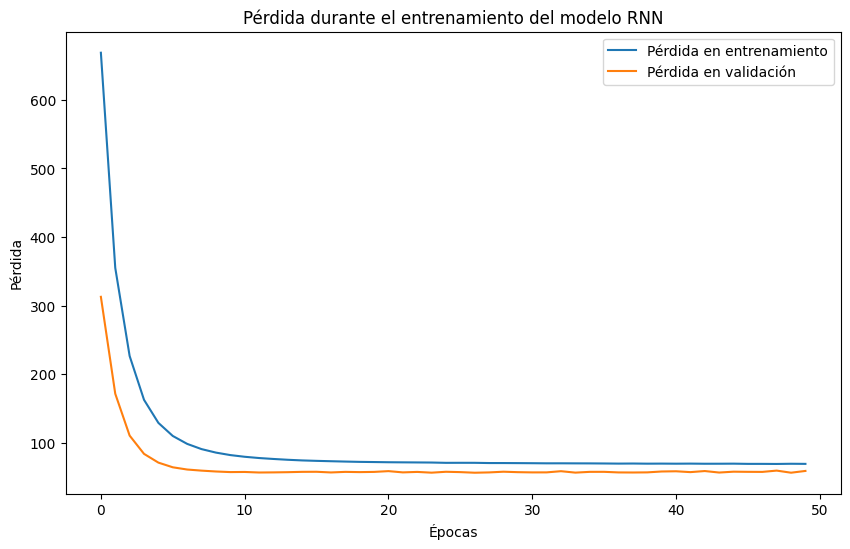

In [72]:
# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10,6))
plt.plot(history_rnn.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history_rnn.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento del modelo RNN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Predicciones

Después del entrenamiento y el cálculo de las pérdidas durante el entrenamiento del modelo, este está listo para realizar predicciones sobre nuevos datos. Esto se logra al alimentar los datos de entrada al modelo entrenado y permitir que este genere predicciones para la variable objetivo. Las predicciones se comparan entonces con los valores reales para evaluar la precisión del modelo. Este proceso permite evaluar cómo se desempeña el modelo en datos que no ha visto durante el entrenamiento y determinar su capacidad para generalizar y hacer predicciones precisas en situaciones del mundo real.

In [73]:
# Realizar predicciones
train_predictions_rnn = model_rnn.predict(X_train)
val_predictions_rnn = model_rnn.predict(X_val)
test_predictions_rnn = model_rnn.predict(X_test)

81/81 [==============================] - 0s 3ms/step


# Metricas de evaluación

Las métricas de evaluación en redes neuronales recurrentes (RNN) se utilizan para medir el rendimiento del modelo en la tarea para la que fue entrenado. Estas métricas proporcionan una forma objetiva de evaluar qué tan bien está funcionando el modelo en comparación con los datos reales.

En el contexto del notebook mencionado, las métricas utilizadas son:

RMSE, RSE, MAE y R^2

#RMSE

RMSE (Root Mean Squared Error): Mide la raíz cuadrada del error cuadrático medio entre las predicciones del modelo y los valores reales. Es útil para tener una idea de la magnitud del error en las predicciones.

In [74]:
# Calcular el error cuadrático medio en los conjuntos de entrenamiento, prueba y validación
train_rmse_rnn = np.sqrt(mean_squared_error(y_train, train_predictions_rnn))
val_rmse_rnn = np.sqrt(mean_squared_error(y_val, val_predictions_rnn))
test_rmse_rnn = np.sqrt(mean_squared_error(y_test, test_predictions_rnn))

# Imprimir los resultados
print("RMSE en conjunto de entrenamiento (RNN):", train_rmse_rnn)
print("RMSE en conjunto de validación (RNN):", val_rmse_rnn)
print("RMSE en conjunto de prueba (RNN):", test_rmse_rnn)

RMSE en conjunto de entrenamiento (RNN): 8.297397411404454
RMSE en conjunto de validación (RNN): 7.65947613557397
RMSE en conjunto de prueba (RNN): 9.152094830260639


#RSE

RSE (Residual Standard Error): Es similar al RMSE pero se calcula en el contexto del modelo de regresión. Mide la desviación estándar de los residuos (diferencias entre los valores observados y predichos).

In [75]:
# Calcule el error cuadrático relativo (RSE) para conjuntos de entrenamiento, validación y prueba
train_mse_rnn = mean_squared_error(y_train, train_predictions_rnn)
val_mse_rnn = mean_squared_error(y_val, val_predictions_rnn)
test_mse_rnn = mean_squared_error(y_test, test_predictions_rnn)

# Calcule la suma total de cuadrados (TSS) para conjuntos de entrenamiento, validación y prueba
train_tss_rnn = np.sum((y_train - np.mean(y_train))**2)
val_tss_rnn = np.sum((y_val - np.mean(y_val))**2)
test_tss_rnn = np.sum((y_test - np.mean(y_test))**2)

# Calcule RSE para conjuntos de entrenamiento, validación y prueba
train_rse_rnn = np.sqrt(train_mse_rnn / train_tss_rnn)
val_rse_rnn = np.sqrt(val_mse_rnn / val_tss_rnn)
test_rse_rnn = np.sqrt(test_mse_rnn / test_tss_rnn)

# imprimir los resultados
print("RSE en conjunto de entrenamiento (RNN):", train_rse_rnn)
print("RSE en conjunto de validación (RNN):", val_rse_rnn)
print("RSE en conjunto de prueba (RNN):", test_rse_rnn)

RSE en conjunto de entrenamiento (RNN): 0.005453844253719814
RSE en conjunto de validación (RNN): 0.012308626242964683
RSE en conjunto de prueba (RNN): 0.014558125658373331


#MAE

MAE (Mean Absolute Error): Calcula el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. Es menos sensible a valores atípicos en comparación con el RMSE.

In [76]:
# Calcule el error absoluto medio (MAE) para conjuntos de entrenamiento, validación y prueba
train_mae_rnn = mean_absolute_error(y_train, train_predictions_rnn)
val_mae_rnn = mean_absolute_error(y_val, val_predictions_rnn)
test_mae_rnn = mean_absolute_error(y_test, test_predictions_rnn)

# imprimir los resultados
print("MAE en conjunto de entrenamiento (RNN):", train_mae_rnn)
print("MAE en conjunto de validación (RNN):", val_mae_rnn)
print("MAE en conjunto de prueba (RNN):", test_mae_rnn)

MAE en conjunto de entrenamiento (RNN): 6.175050572839161
MAE en conjunto de validación (RNN): 5.816053404728603
MAE en conjunto de prueba (RNN): 6.6022865127049535


#R^2

R^2 (Coeficiente de determinación): Proporciona una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales. Es una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.

In [77]:
# Calcule la puntuación R cuadrado (R²) para conjuntos de entrenamiento, validación y prueba
train_r2_score_rnn = r2_score(y_train, train_predictions_rnn)
val_r2_score_rnn = r2_score(y_val, val_predictions_rnn)
test_r2_score_rnn = r2_score(y_test, test_predictions_rnn)

# imprimir los resultados
print("R-squared score en conjunto de entrenamiento (RNN):", train_r2_score_rnn)
print("R-squared score en conjunto de validación (RNN):", val_r2_score_rnn)
print("R-squared score en conjunto de prueba (RNN):", test_r2_score_rnn)

R-squared score en conjunto de entrenamiento (RNN): 0.6411336071596593
R-squared score en conjunto de validación (RNN): 0.6089726153483939
R-squared score en conjunto de prueba (RNN): 0.45256150440467613


# Grafica de resultados

Graficar las predicciones del modelo proporciona una instantánea clara y concisa del rendimiento del mismo. Al observar cómo las predicciones se superponen con los datos de entrenamiento, validación y prueba, se puede inferir que el modelo ha captado efectivamente los patrones y tendencias presentes en los datos. Además, al incluir la predicción de un nuevo dato en la gráfica, y ver su cercanía con los datos reales, se sugiere que el modelo ha aprendido de manera sólida y generaliza bien incluso en datos no vistos previamente, indicando un buen rendimiento en la predicción de nuevos datos.

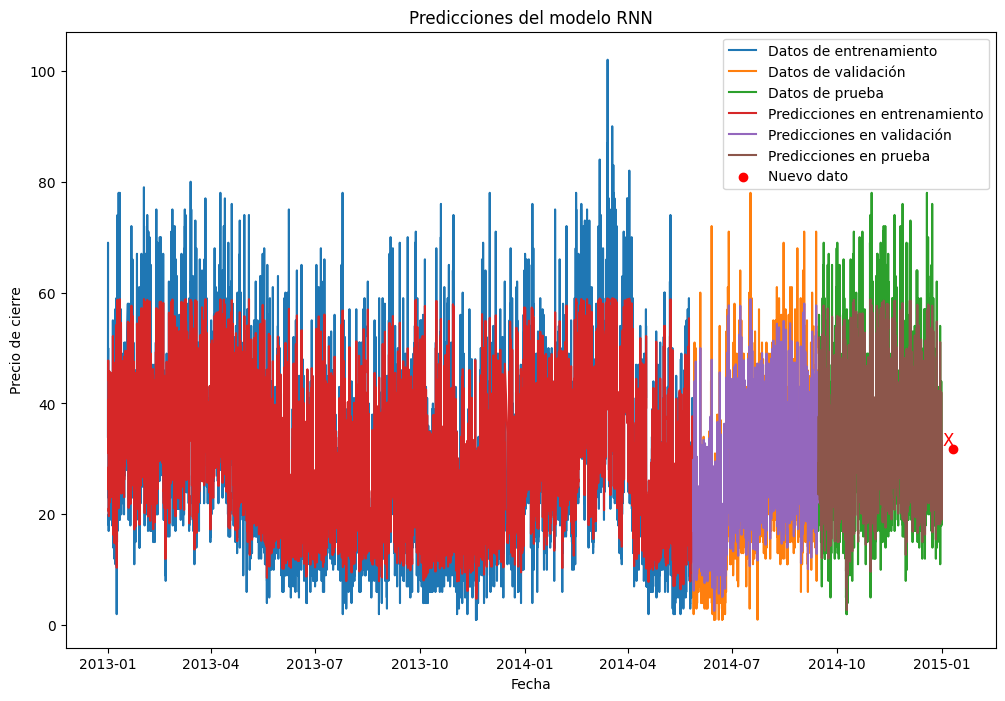

In [78]:
# Graficar resultados
plt.figure(figsize=(12, 8))

# Datos de entrenamiento
plt.plot(data.index[:train_size], data['PM2.5'][:train_size], label='Datos de entrenamiento')

# Datos de validación
plt.plot(data.index[train_size:train_size+val_size], data['PM2.5'][train_size:train_size+val_size], label='Datos de validación')

# Datos de prueba
plt.plot(data.index[train_size+val_size:], data['PM2.5'][train_size+val_size:], label='Datos de prueba')

# Predicciones en entrenamiento
plt.plot(data.index[seq_length:train_size], train_predictions_rnn, label='Predicciones en entrenamiento')

# Predicciones en validación
plt.plot(data.index[train_size+seq_length:train_size+val_size], val_predictions_rnn, label='Predicciones en validación')

# Predicciones en prueba
plt.plot(data.index[train_size+val_size+seq_length:], test_predictions_rnn, label='Predicciones en prueba')

# Añadir el nuevo dato para predicción
new_date = data.index[-1] + pd.DateOffset(days=10) ##Definir el numero de dias a pronosticar
plt.scatter(new_date, test_predictions_rnn[-1], color='red', label='Nuevo dato', zorder=5)
plt.text(new_date, test_predictions_rnn[-1], 'X', color='red', fontsize=12, ha='right', va='bottom')

plt.title('Predicciones del modelo RNN')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()